   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 809.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.5 MB/s eta 0:00:00


Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 141MB/s]


Saving images (1).jpeg to images (1) (3).jpeg


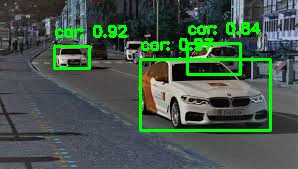

In [ ]:
# Step 1: Install dependencies (if needed)
!pip install -q torch torchvision matplotlib opencv-python

# Step 2: Import libraries
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from torchvision.models.detection.ssd import SSD300_VGG16_Weights
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Step 3: Load the SSD model with pretrained weights
weights = SSD300_VGG16_Weights.DEFAULT
model = torchvision.models.detection.ssd300_vgg16(weights=weights)
model.eval()  # Set model to evaluation mode

# Step 4: Define the transform (same as model weights expect)
transform = weights.transforms()

# Step 5: Upload and load image
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Step 6: Predict
with torch.no_grad():
    preds = model(img_tensor)[0]

# Step 7: Visualize predictions
def draw_boxes(image_pil, predictions, score_threshold=0.5):
    image = np.array(image_pil)
    boxes = predictions['boxes']
    labels = predictions['labels']
    scores = predictions['scores']
    categories = weights.meta["categories"]

    for box, label, score in zip(boxes, labels, scores):
        if score >= score_threshold:
            x1, y1, x2, y2 = box.int().tolist()
            cv2.rectangle(image, (x1, y1), (x2, y2), color=(0,255,0), thickness=2)
            text = f"{categories[label]}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (0, 255, 0), 2)

    cv2_imshow(image)

draw_boxes(image, preds)


Saving An-example-of-a-complex-traffic-situation-pictures-used-in-actual-tests-had-no-snow-or.png to An-example-of-a-complex-traffic-situation-pictures-used-in-actual-tests-had-no-snow-or.png


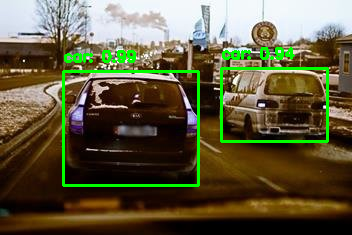

In [ ]:
# Step 1: Install dependencies (if needed)
!pip install -q torch torchvision matplotlib opencv-python

# Step 2: Import libraries
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from torchvision.models.detection.ssd import SSD300_VGG16_Weights
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Step 3: Load the SSD model with pretrained weights
weights = SSD300_VGG16_Weights.DEFAULT
model = torchvision.models.detection.ssd300_vgg16(weights=weights)
model.eval()  # Set model to evaluation mode

# Step 4: Define the transform (same as model weights expect)
transform = weights.transforms()

# Step 5: Upload and load image
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Step 6: Predict
with torch.no_grad():
    preds = model(img_tensor)[0]

# Step 7: Visualize predictions
def draw_boxes(image_pil, predictions, score_threshold=0.5):
    image = np.array(image_pil)
    boxes = predictions['boxes']
    labels = predictions['labels']
    scores = predictions['scores']
    categories = weights.meta["categories"]

    for box, label, score in zip(boxes, labels, scores):
        if score >= score_threshold:
            x1, y1, x2, y2 = box.int().tolist()
            cv2.rectangle(image, (x1, y1), (x2, y2), color=(0,255,0), thickness=2)
            text = f"{categories[label]}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (0, 255, 0), 2)

    cv2_imshow(image)

draw_boxes(image, preds)


Saving Screenshot 2025-04-16 192948.png to Screenshot 2025-04-16 192948.png


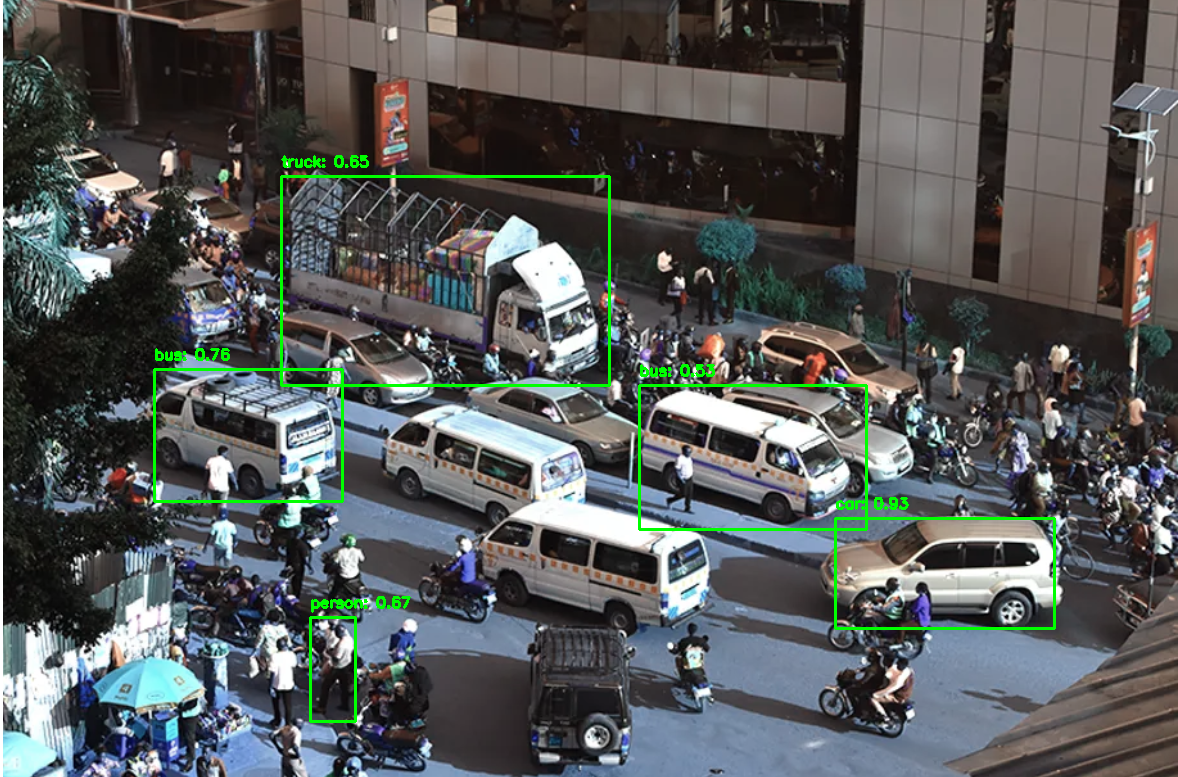

In [ ]:
# Step 5: Upload and load image
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Step 6: Predict
with torch.no_grad():
    preds = model(img_tensor)[0]

# Step 7: Visualize predictions
def draw_boxes(image_pil, predictions, score_threshold=0.5):
    image = np.array(image_pil)
    boxes = predictions['boxes']
    labels = predictions['labels']
    scores = predictions['scores']
    categories = weights.meta["categories"]

    for box, label, score in zip(boxes, labels, scores):
        if score >= score_threshold:
            x1, y1, x2, y2 = box.int().tolist()
            cv2.rectangle(image, (x1, y1), (x2, y2), color=(0,255,0), thickness=2)
            text = f"{categories[label]}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (0, 255, 0), 2)

    cv2_imshow(image)

draw_boxes(image, preds)